# Imdb Movies' EDA

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from helper import *

pd.set_option('display.max_columns', 100)

## The question

What factors make a movie financially successful? Is it a question of genre and/or actors and directors taking part in the movie or do the movie rating sites play a role in making a movie successful (or, as it has been said [here](article to be chosen), *unsuccessful*)?

In [ ]:
# import pickle data as imdb

**From here start to deal only with USA normal budget post 1990 movies???**

Now I create a list of all the actors and and one of all the directors in the dataset:

In [58]:
actors = actors_list(imdb)
actors.head()

,facebook_likes
actor,
50 Cent,1000.0
A. Michael Baldwin,174.0
A.J. Buckley,275.0
A.J. Langer,254.0
AJ Michalka,560.0


In [59]:
directors = directors_list(imdb)
directors.head()

,facebook_likes
director,
Aaron Schneider,11.0
Aaron Seltzer,64.0
Abel Ferrara,220.0
Adam Brooks,20.0
Adam Carolla,102.0


Here I start analyzing movies by actors, creating a new dataset containing likes and gross/budget data by actor and movie. I probably should find a way to weigh in the actors importance in the calculation of an actor's ROI.

In [60]:
imdb_by_actor = movies_by_actor(imdb, actors)
imdb_by_actor.head()

,movie_title,gross,budget,ROI,log_ROI,actor_importance,actor,facebook_likes
0,Avatar,760505847.0,237000000.0,2.208885,0.506354,1,CCH Pounder,1000.0
269,End of Days,66862068.0,83000000.0,-0.194433,-0.093898,1,CCH Pounder,1000.0
1922,RoboCop 3,10696210.0,23500000.0,-0.544842,-0.341838,1,CCH Pounder,1000.0
2662,Tales from the Crypt: Demon Knight,21088568.0,13000000.0,0.622198,0.210104,1,CCH Pounder,1000.0
4456,Face/Off,112225777.0,80000000.0,0.402822,0.147003,2,CCH Pounder,1000.0


Let's see who the top 20 actors by ROI are:

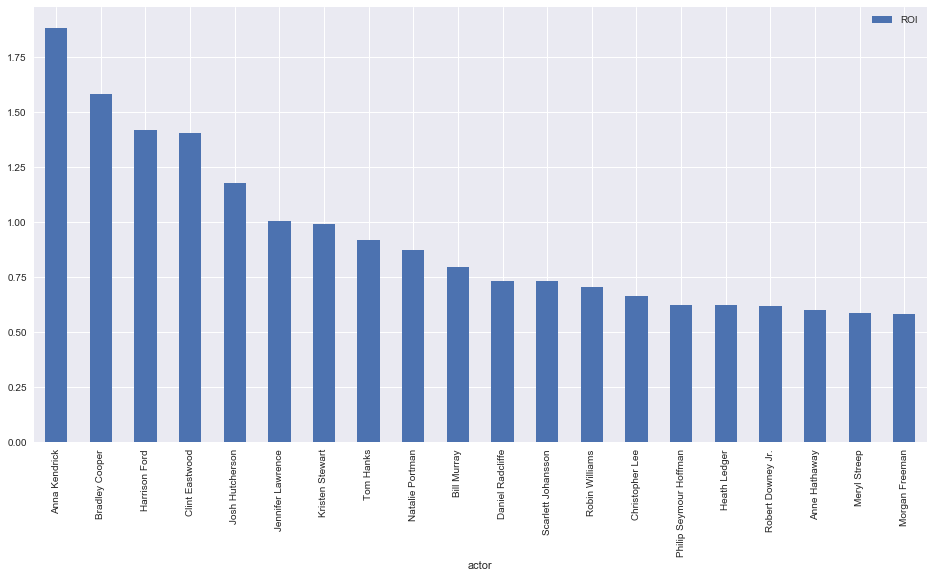

In [61]:
imdb_actors_ROI = actors_ROI(imdb_by_actor)
imdb_actors_ROI[(imdb_actors_ROI.number_movies > 9) & (imdb_actors_ROI.facebook_likes > 9999)].sort_values(by='ROI', ascending=False).head(20).plot.bar(y=['ROI'], figsize=(16, 8));

Now I do the same for directors and genres:

**by genre:**

In [62]:
imdb_by_genre = movies_by_genre(imdb)
imdb_by_genre.head()

,movie_title,title_year,gross,budget,ROI,log_ROI,genre
99,Alexander,2004.0,34293771.0,155000000.0,-0.778750,-0.655116,Biography
228,The Aviator,2004.0,102608827.0,110000000.0,-0.067192,-0.030208,Biography
241,Ali,2001.0,58183966.0,107000000.0,-0.456225,-0.264580,Biography
254,Public Enemies,2009.0,97030725.0,100000000.0,-0.029693,-0.013091,Biography
255,American Gangster,2007.0,130127620.0,100000000.0,0.301276,0.114369,Biography


In [63]:
imdb_genres_ROI = genres_ROI(imdb_by_genre)

These are the genres sorted by ROI: setting aside the documentaries, which are somewhat a particular category, we see that the most profitable movies include music or sport and they are family movies. We can also note that biographical movies tend to be quite profitable. In this ranking we see that "traditional" genres (such as thriller, action, comedy and so on) are lower: I guess this is due to the fact that a lot of movies of these genres are made and the number of successful ones is hidden by the unsuccessful ones (you know, something like let's make an action movie with such actors and then it's a flop). For this it may be interesting to investigate how profitable are the top n movies for each genre.

It could also be interesting to explore genre by years and see how they are moving up or down (for example I think the biopic rise is something recent, I don't remember many biographic movies prior to some 10 years ago...).

In [64]:
imdb_genres_ROI.sort_values(by='ROI', ascending=False)

,ROI,number_movies,total_budget,total_gross
genre,,,,
Documentary,1.515244,91.0,4.385465e+08,1.103052e+09
Music,0.583791,278.0,7.281708e+09,1.153270e+10
Sport,0.407393,163.0,4.681460e+09,6.588656e+09
Musical,0.385900,108.0,4.200506e+09,5.821479e+09
Family,0.328901,459.0,3.031447e+10,4.028492e+10
Biography,0.311800,259.0,6.764844e+09,8.874120e+09
Romance,0.304168,932.0,2.889698e+10,3.768653e+10
Mystery,0.301712,395.0,1.356408e+10,1.765653e+10
Short,0.253146,1.0,6.000000e+06,7.518876e+06


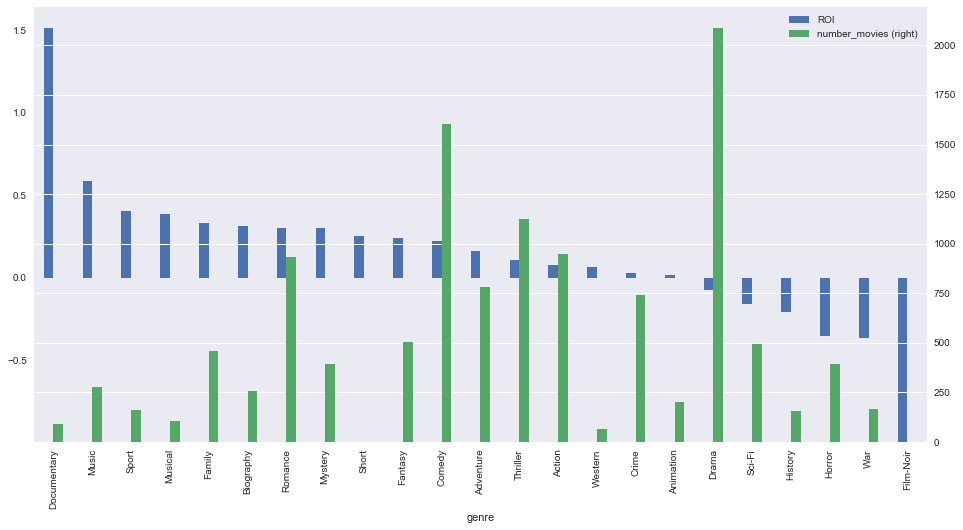

In [65]:
imdb_genres_ROI[['ROI', 'number_movies']].sort_values(by='ROI', ascending=False).plot.bar(figsize=(16, 8), secondary_y=['number_movies']);

**by director:**

In [67]:
imdb_by_director = movies_by_director(imdb, directors)
imdb_by_director.head()

,movie_title,director_name,gross,budget,ROI,log_ROI,facebook_likes
0,Avatar,James Cameron,760505847.0,237000000.0,2.208885,0.506354,0.0
26,Titanic,James Cameron,658672302.0,200000000.0,2.293362,0.517639,0.0
288,Terminator 2: Judgment Day,James Cameron,204843350.0,102000000.0,1.008268,0.302822,0.0
291,True Lies,James Cameron,146282411.0,115000000.0,0.272021,0.104494,0.0
606,The Abyss,James Cameron,54222000.0,69500000.0,-0.219827,-0.107809,0.0


Let's see who the top 20 directors by net_ratio are (here I don't filter by facebook likes since for many directors it is missing):

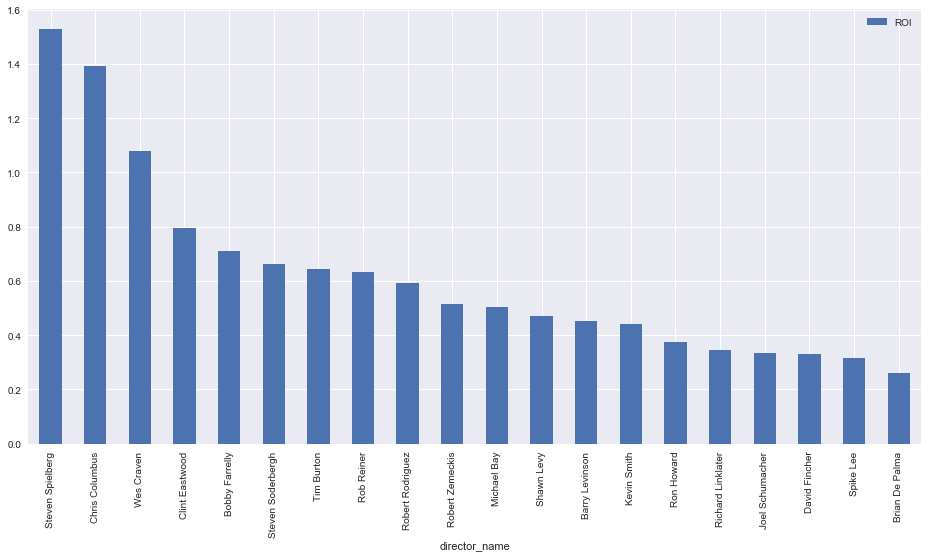

In [70]:
imdb_directors_ROI = directors_ROI(imdb_by_director)
imdb_directors_ROI[(imdb_directors_ROI.number_movies > 9)].sort_values(by='ROI', ascending=False).head(20).plot.bar(y=['ROI'], figsize=(16, 8));

**by year and genre:**

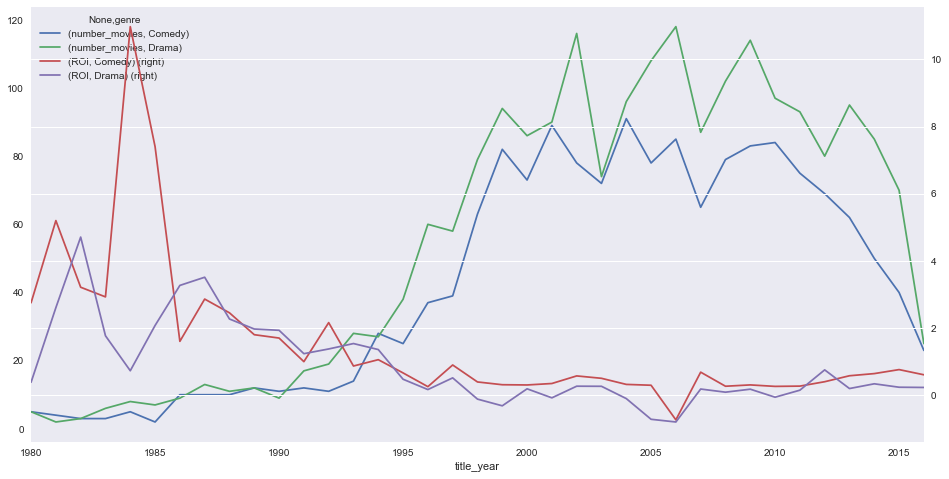

In [71]:
genre_year_plotting(imdb_by_genre, ['Comedy', 'Drama'])

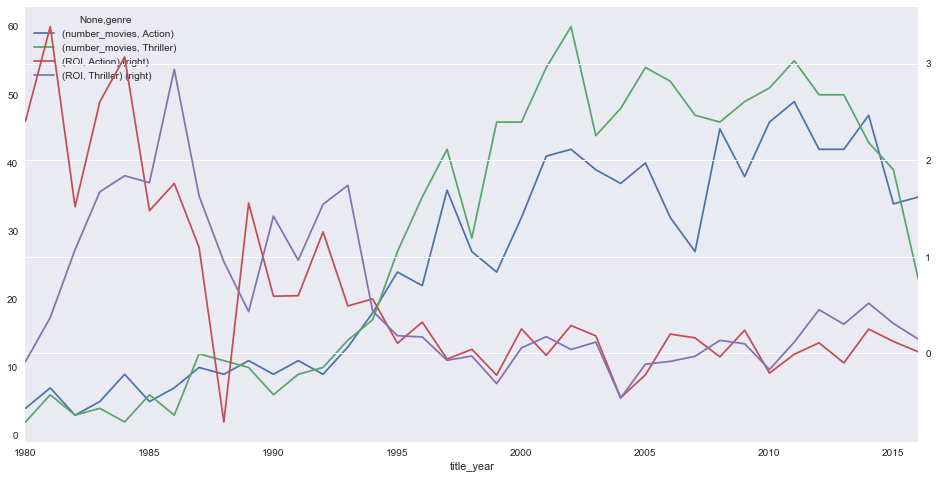

In [72]:
genre_year_plotting(imdb_by_genre, ['Thriller', 'Action'])

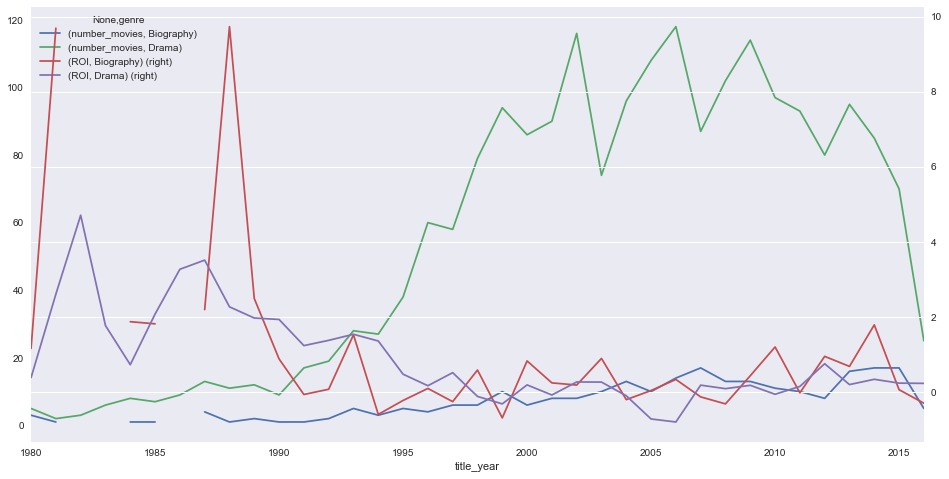

In [73]:
genre_year_plotting(imdb_by_genre, ['Drama', 'Biography'])

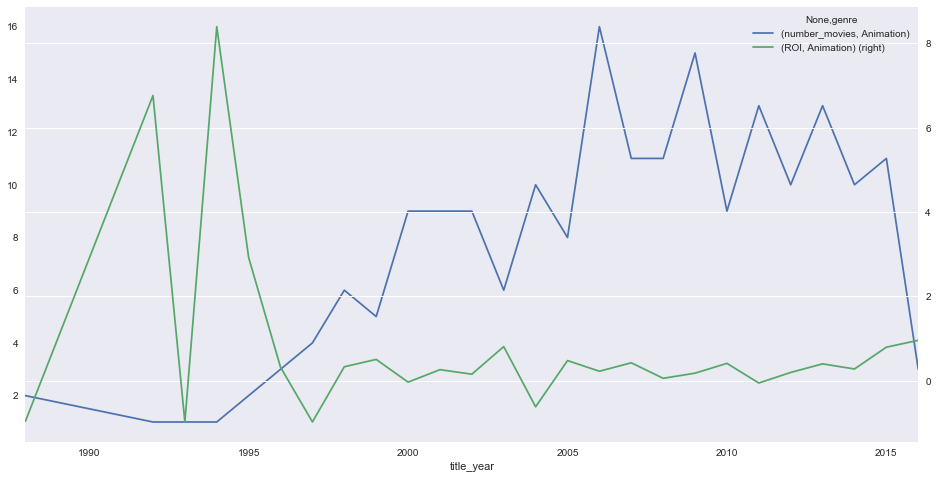

In [74]:
genre_year_plotting(imdb_by_genre, ['Animation'])

There seem to be a general trend: ROI tends to be higher when there are less movies in the year.

**top n profitable movies by genre:**

In [76]:
top_movies_by_genre(imdb_by_genre, 'Biography', 1, 1000)

,movie_title,title_year,gross,budget,ROI,log_ROI,genre
3933,Tarnation,2003.0,592014.0,218.0,2714.660550,3.433875,Biography
3885,Open Water,2003.0,30500882.0,500000.0,60.001764,1.785342,Biography
2982,The Sound of Music,1965.0,163214286.0,8200000.0,18.904181,1.298944,Biography
3837,Fruitvale Station,2013.0,16097842.0,900000.0,16.886491,1.252525,Biography
3162,Butch Cassidy and the Sundance Kid,1969.0,102308900.0,6000000.0,16.051483,1.231762,Biography
3695,Bloodsport,1988.0,11806119.0,1100000.0,9.732835,1.030714,Biography
3231,Chariots of Fire,1981.0,58800000.0,5500000.0,9.690909,1.029015,Biography
2545,"Good Morning, Vietnam",1987.0,123922370.0,13000000.0,8.532490,0.979206,Biography
2353,The King's Speech,2010.0,138795342.0,15000000.0,8.253023,0.966284,Biography
4021,20 Dates,1998.0,536767.0,60000.0,7.946117,0.951635,Biography


1. Living actors (exclude dead ones)
2. Add actors' sex, age and so on
3. Out of curiosity: actors who are also directors (I see Clint Eastwood there)
4. Outliers on the right of net_ratio, they may be low budget movies with great incomes (such as Blair Witch Project): how much do they affect the analysis? Should I exclude them?
5. Movies with 0 facebook likes (in the kaggle page they say it's because of timeout from the facebook API): should I drop them?
6. Is there a cult movie effect? That is, movies with low gross that have become very popular in time (see Army of Darkness for example)
7. I found some imprecisions in this dataset looking at Army of Darkness: the budget isn't right (on imdb page it is reported 11M dollars). Also, the gross is USA gross, worldwide gross is different (21.5M dollars) and more meaningful. See [this site](http://www.the-numbers.com/movie/budgets/all/1) for more precise numbers.
8. I would like to add data from other movie sites. (imdb [API](http://www.omdbapi.com/) provides them!)
9. Recent [article](http://www.latimes.com/business/hollywood/la-fi-ct-rotten-tomatoes-20170721-htmlstory.html) about the sites votes influencing the revenues for movies (I remember Rotten Tomatoes with its yes or no votes was criticized). Alto [this](http://www.hollywoodreporter.com/news/studios-fight-back-withering-rotten-tomatoes-scores-1025575), and [this](http://miamistudent.net/rotten-tomatoes-influence-and-the-importance-of-bad-movies/) and [this](https://www.wired.com/story/is-rotten-tomatoes-ruining-movies/).
10. Is there data on an actor/director medium pay? Or even how much did they take for a given movie?
11. Account for number of reviews!
12. Which genres' combinations are the most effective?
13. Grouping genres more succinctly?
14. [Divide movies in micro, low, and normal budget](https://stephenfollows.com/average-budget-low-micro-budget-film/)
15. Date of release, DVD release date etc. (Also on imdb [API](http://www.omdbapi.com/).)

In [77]:
imdb[imdb.movie_title=='Army of Darkness']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI,log_ROI,Action,Film-Noir,War,Documentary,Sci-Fi,Animation,Romance,History,Short,Horror,Family,Comedy,Adventure,Musical,Drama,News,Mystery,Thriller,Music,Biography,Crime,Western,Sport,Fantasy
3056,Color,Sam Raimi,221.0,88.0,0.0,795.0,Bridget Fonda,901.0,11501093.0,Comedy|Fantasy|Horror,Patricia Tallman,Army of Darkness,128850,3913,Embeth Davidtz,0.0,army of the dead|battle|necronomicon|reluctant...,http://www.imdb.com/title/tt0106308/?ref_=fn_t...,604.0,English,USA,R,13000000.0,1992.0,888.0,7.6,1.85,10000,-0.115301,-0.053204,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
imdb['budget_type'] = imdb.budget.apply(budget_type)

In [82]:
imdb.budget_type.value_counts()

normal    3704
low        256
micro       90
Name: budget_type, dtype: int64

In [83]:
imdb[imdb.budget_type=='micro'].sort_values(by='ROI', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI,log_ROI,Action,Film-Noir,War,Documentary,Sci-Fi,Animation,Romance,History,Short,Horror,Family,Comedy,Adventure,Musical,Drama,News,Mystery,Thriller,Music,Biography,Crime,Western,Sport,Fantasy,budget_type
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,Micah Sloat,Paranormal Activity,184824,330,Amber Armstrong,0.0,dark force|entity|evil force|found footage|par...,http://www.imdb.com/title/tt1179904/?ref_=fn_t...,1189.0,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,7193.485533,3.857000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,micro
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,Greg Ayres,Tarnation,5709,78,Renee Leblanc,3.0,answering machine|home movie|lithium|schizophr...,http://www.imdb.com/title/tt0390538/?ref_=fn_t...,114.0,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,2714.660550,3.433875,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,micro
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,Heather Donahue,The Blair Witch Project,186786,399,Michael C. Williams,0.0,found footage|looking at the camera|lost in th...,http://www.imdb.com/title/tt0185937/?ref_=fn_t...,3400.0,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,2341.168567,3.369618,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,micro
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,6375,388,Maxine Bahns,0.0,abusive father|critically acclaimed|loss of fa...,http://www.imdb.com/title/tt0112585/?ref_=fn_t...,36.0,English,USA,R,25000.0,1995.0,111.0,6.6,1.85,265,408.864000,2.612640,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,micro
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,96411,1094,Marilyn Burns,0.0,cannibal|chainsaw|hitchhiker|independent film|...,http://www.imdb.com/title/tt0072271/?ref_=fn_t...,826.0,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,368.427285,2.567529,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,micro
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,290.560000,2.464728,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,micro
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,Pfeifer Brown,The Gallows,13521,276,Reese Mishler,0.0,breaking and entering|gallows|hanging|high sch...,http://www.imdb.com/title/tt2309260/?ref_=fn_t...,150.0,English,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,226.578190,2.357131,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,micro
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,Chemeeka Walker,Super Size Me,85028,0,Amelia Giancarlo,2.0,experiment|fast food|food industry|meal|overea...,http://www.imdb.com/title/tt0390521/?ref_=fn_t...,404.0,English,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0,176.374892,2.248892,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,micro
4821,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,157863,4400,P.J. Soles,0.0,halloween|masked killer|michael myers|slasher|...,http://www.imdb.com/title/tt0077651/?ref_=fn_t...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35